In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from scipy.stats import randint, uniform

In [2]:
from sklearn.cluster import KMeans

## IMPORT & EXPLORE

#### FUNCTIONS

In [12]:
from kneed import KneeLocator

def find_elbow_from_results(clustering_results, plot=True):
    k_values = [item['k'] for item in clustering_results]
    inertias = [item['inertia'] for item in clustering_results]

    knee = KneeLocator(k_values, inertias, curve="convex", direction="decreasing")
    elbow_k = knee.elbow

    if plot:
        plt.figure(figsize=(8, 5))
        plt.plot(k_values, inertias, marker='o')
        if elbow_k is not None:
            plt.axvline(elbow_k, color='red', linestyle='--', label=f'Elbow at k={elbow_k}')
            plt.legend()
        plt.title('KMeans Inertia vs. Number of Clusters')
        plt.xlabel('Number of clusters (k)')
        plt.ylabel('Inertia')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return elbow_k

#### DATA

In [20]:
flip_books_data_embeded = pd.read_csv(r"C:\Users\User\Desktop\DATA SCIENCE\Github\flip_book\data\flip_books_data_embeded.csv.gz")

In [4]:
flip_books_data_embeded.shape

(5400, 800)

## CLEAN & PREPARE

In [21]:
flip_books_data_embeded_features = flip_books_data_embeded.select_dtypes(include = ('number'))

In [8]:
flip_books_data_embeded_features.sample(5)

,price_original,discount,reviews_count,publisher_code,binding_code,category_id,img_emb_0,img_emb_1,img_emb_2,img_emb_3,...,txt_emb_758,txt_emb_759,txt_emb_760,txt_emb_761,txt_emb_762,txt_emb_763,txt_emb_764,txt_emb_765,txt_emb_766,txt_emb_767
3810,1068,25,1,30,0,386,0.589406,1.323572,1.118802,0.496043,...,0.030668,0.011042,0.042247,0.002741,0.002766,-0.023784,0.017529,0.019747,0.023054,-0.005170
2243,4639,30,0,128,1,279,0.663162,1.264546,1.151859,0.634478,...,-0.018861,-0.007651,0.011659,-0.034252,0.023217,-0.069403,0.005199,-0.017578,-0.032380,-0.036112
3301,4365,20,10,41,1,505,0.563958,1.350820,1.114511,0.387549,...,-0.057099,-0.036081,-0.047174,-0.065124,-0.052148,-0.070839,-0.068221,0.019717,-0.010234,-0.048038
3104,3494,25,28,80,0,505,0.215646,0.843977,0.683332,0.696179,...,-0.027170,0.000789,-0.077570,-0.039102,-0.051232,-0.007619,-0.038758,-0.050732,-0.036371,-0.040541
2495,4312,20,1,143,0,142,0.095226,0.499104,0.445171,0.865982,...,0.003286,0.018648,-0.003009,-0.004539,-0.024359,0.052242,0.046206,0.008300,0.037301,-0.040565


## MODEL BUILD

In [9]:


clustering_results = []

for k in range( 5, 100, 1 ):

    kmeans = KMeans( n_clusters = k, random_state=42 )
    kmeans.fit_transform(flip_books_data_embeded_features)

    kmeans_inertia = kmeans.inertia_

    clustering_results.append( { 'k' : k,
                                 'inertia' : kmeans_inertia} )



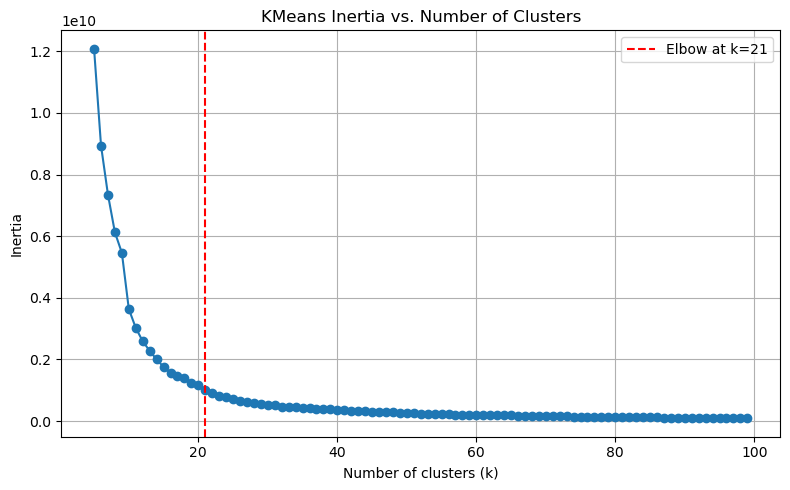

Elbow point detected at k = 21


In [13]:
elbow = find_elbow_from_results(clustering_results)
print(f"Elbow point detected at k = {elbow}")

In [14]:
flip_book_kmeans21 = KMeans( n_clusters = 21 )

In [15]:
flip_book_kmeans21.fit_transform(flip_books_data_embeded_features)

array([[  606.53191512, 12060.05390238,  3284.16132979, ...,
        42250.14843174,  8215.08609676,   259.4959703 ],
       [11313.30761337,  1328.28331567,  7460.18497078, ...,
        31513.19955802,  7619.21138042, 10566.52439042],
       [ 7737.01864685,  4900.86062264,  3885.15141092, ...,
        35090.24191115,  5965.64246914,  6990.3855478 ],
       ...,
       [  285.70449035, 12896.51778336,  4117.33552979, ...,
        43087.02851476,  8773.60139686,  1015.57508403],
       [ 1324.81174937, 11314.5736279 ,  2536.27290487, ...,
        41505.03327525,  7645.5670898 ,   584.53277103],
       [ 5553.89719963,  7081.6555722 ,  1702.43389418, ...,
        37272.12580239,  5789.44308922,  4807.21419657]])

In [22]:
flip_books_data_embeded['kmeans21_cluster'] = flip_book_kmeans21.predict(flip_books_data_embeded_features)

In [46]:
flip_books_data_embeded[['title','description','windows_image_path','kmeans21_cluster']].sample(5)

,title,description,windows_image_path,kmeans21_cluster
1685,Русско - казахский терминологический словарь с...,Русско-казахский словарь- справочник по видам ...,C:\Users\User\Desktop\DATA SCIENCE\DataSets\fl...,16
4954,Академия божественных жен. Разрушение,Я узнала тайну академии. Страшная участь обошл...,C:\Users\User\Desktop\DATA SCIENCE\DataSets\fl...,10
3583,Без нервов. Воркбук самопомощи,"В моей библиотеке есть не только книги, но и ц...",C:\Users\User\Desktop\DATA SCIENCE\DataSets\fl...,8
4826,"Друд, или Человек в чёрном",Неподражаемый. Великолепный. Добрый друг. Сотн...,C:\Users\User\Desktop\DATA SCIENCE\DataSets\fl...,6
4760,Самое красное яблоко,В садах моей матери растут самые красные яблок...,C:\Users\User\Desktop\DATA SCIENCE\DataSets\fl...,10


## SAVE

In [49]:
flip_books_data_embeded.to_csv('flip_books_data_embeded_clustered.csv.gz',index = False, compression = 'gzip')